In [2]:
import pandas as pd

# Load the regular season and playoff data (semicolon-separated and encoding handled)
regular_season_df = pd.read_csv('2023-2024 NBA Player Stats - Regular.csv', sep=';', encoding='latin1')
playoffs_df = pd.read_csv('2023-2024 NBA Player Stats - Playoffs.csv', sep=';', encoding='latin1')

In [4]:
# Dropping any rows with missing values (if necessary)
regular_season_df = regular_season_df.dropna()
playoffs_df = playoffs_df.dropna()

# Rename columns if needed (for easier access)
regular_season_df.rename(columns={'Tm': 'Team','PTS': 'Points', 'TRB': 'Rebounds', 'AST': 'Assists'}, inplace=True)
playoffs_df.rename(columns={'Tm': 'Team','PTS': 'Points', 'TRB': 'Rebounds', 'AST': 'Assists'}, inplace=True)

In [30]:
top_regular_rebounds = regular_season_df[['Player', 'Rebounds']].nlargest(10, 'Rebounds').reset_index()
top_playoffs_rebounds = playoffs_df[['Player', 'Rebounds']].nlargest(10, 'Rebounds').reset_index()

print('Top 10 players with the most rebounds in the regular season')
print(top_regular_rebounds)

print('Top 10 players with the most rebounds in the playoffs')
print(top_playoffs_rebounds)

Top 10 players with the most rebounds in the regular season
   index                 Player  Rebounds
0    577       Domantas Sabonis      13.7
1    241            Rudy Gobert      12.9
2    155          Anthony Davis      12.6
3    340           Nikola Joki?      12.4
4    181            Jalen Duren      11.6
5     14  Giannis Antetokounmpo      11.5
6     22          Deandre Ayton      11.1
7    186            Joel Embiid      11.0
8    492           Jusuf Nurki?      11.0
9    121           Clint Capela      10.6
Top 10 players with the most rebounds in the playoffs
   index             Player  Rebounds
0     37      Anthony Davis      15.6
1      4      Jarrett Allen      13.8
2     97       Nikola Joki?      13.4
3     69          Josh Hart      11.5
4    157       Bobby Portis      11.3
5    193  Jonas Valan?i?nas      11.0
6     46        Joel Embiid      10.8
7     57        Rudy Gobert       9.8
8    183       Jayson Tatum       9.7
9     42        Luka Don?i?       9.5


In [22]:
team_player_assists_regular_idx = regular_season_df.groupby('Team')['Assists'].idxmax()
team_player_assists_regular = regular_season_df.loc[team_player_assists_regular_idx,['Team', 'Player', 'Assists']].reset_index()
print("Player with the most assists on each team for regular season")
team_player_assists_regular

Player with the most assists on each team for regular season


,index,Team,Player,Assists
0,731,ATL,Trae Young,10.8
1,694,BOS,Derrick White,5.2
2,168,BRK,Spencer Dinwiddie,6.0
3,159,CHI,DeMar DeRozan,5.3
4,30,CHO,LaMelo Ball,8.0
5,222,CLE,Darius Garland,6.5
6,171,DAL,Luka Don?i?,9.8
7,340,DEN,Nikola Joki?,9.0
8,149,DET,Cade Cunningham,7.5
9,509,GSW,Chris Paul,6.8


In [24]:
team_player_assists_playoffs_idx = playoffs_df.groupby('Team')['Assists'].idxmax()
team_player_assists_playoffs = playoffs_df.loc[team_player_assists_playoffs_idx,['Team', 'Player', 'Assists']].reset_index()
print("Player with the most assists on each team for playoffs")
team_player_assists_playoffs

Player with the most assists on each team for playoffs


,index,Team,Player,Assists
0,183,BOS,Jayson Tatum,6.3
1,52,CLE,Darius Garland,5.8
2,42,DAL,Luka Don?i?,8.1
3,97,DEN,Nikola Joki?,8.7
4,63,IND,Tyrese Haliburton,8.2
5,65,LAC,James Harden,8.0
6,92,LAL,LeBron James,8.8
7,75,MIA,Tyler Herro,5.4
8,15,MIL,Patrick Beverley,5.5
9,45,MIN,Anthony Edwards,6.5


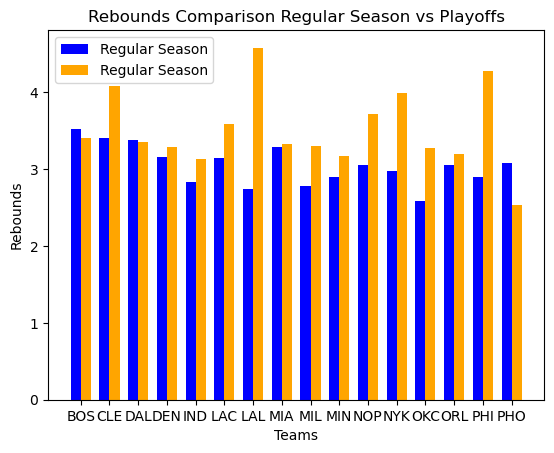

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#generating the average team rebounds for the regular season and playoffs 
team_avg_rebounds_regular = regular_season_df.groupby('Team')[['Rebounds']].mean().reset_index()
team_avg_rebounds_playoffs = playoffs_df.groupby('Team')[['Rebounds']].mean().reset_index()

#mergining the playoffs and regular season
regular_playoffs_rebounds = pd.merge(team_avg_rebounds_regular,team_avg_rebounds_playoffs, on='Team')
regular_playoffs_rebounds.rename(columns={'Rebounds_x':'Rebounds_Regular','Rebounds_y':'Rebounds_Playoffs'}, inplace=True)

#creating plots 
bar_width = 0.35 
x = np.arange(len(regular_playoffs_rebounds['Team']))
plt.bar(x - bar_width/2, regular_playoffs_rebounds['Rebounds_Regular'], width=bar_width, label = 'Regular Season', color = 'blue')
plt.bar(x + bar_width/2, regular_playoffs_rebounds['Rebounds_Playoffs'], width=bar_width, label = 'Regular Season', color = 'orange')
plt.title('Rebounds Comparison Regular Season vs Playoffs')
plt.xlabel('Teams')
plt.ylabel('Rebounds')
plt.xticks(x, regular_playoffs_rebounds['Team'])
plt.legend()
plt.tight_layout
plt.show()

In [56]:
print('The Los Angeles Lakers enjoyed the greatest increase in rebounds from the regular season to the playoffs and the Phoenix Suns saw the biggest decrease')

The Los Angeles Lakers enjoyed the greatest increase in rebounds from the regular season to the playoffs and the Phoenix Suns saw the biggest decrease
